# SRU
Source: [OpenML](https://www.openml.org/d/23515)

The sulfur recovery unit (SRU) removes environmental pollutants from acid gas streams before they are released into the atmosphere. Furthermore, elemental sulfur is recovered as a valuable by-product.  

Acid gases are among the most dangerous air pollution factors and are one of the main causes of acid rain. Hydrogen sulfide is particularly dangerous because it prevents the cells of the human body from breathing.

The SRU takes in two kinds of acid gases as input. The first, rich in H2S, called MEA gas, comes from the gas washing plants; the second, called SWS gas, rich in H2S and NH3 (ammonia), comes from the sour water stripping (SWS) plant. Acid gases are burnt in reactors, where H2S is transformed into pure sulfur via a partial oxidation reaction with air. Gaseous combustion products from furnaces are cooled, causing the generation of liquid sulfur, which is collected in catch basins, and then passed through high temperature converters, where a further reaction leads to the formation of water vapor and sulfur. The remaining, non converted gas (less than 5%), is fed to the Maxisulfur plant for a final conversion phase. The final gas stream (tail gas) from the SRU contains residual H2S and SO2. 

__Hydrogen sulfide and sulfur dioxide frequently cause damage to sensors, which often have to be removed for maintenance.__

5 inputs variables are gas and air flows.
2 outputs to predict are H2S and SO2 concentrations

|Variable| Description|
| :- |:-|
|a1 |gas flow MEA_GAS|
|a2 |air flow AIR_MEA|
|a3 |secondary air flow AIR_MEA_2|
|a4 |gas flow in SWS zone (SWS_GAS_TOT=SWS_GAS+MEA_SPILLING)|
|a5 |air flow in SWS zone (AIR_SWS_TOT=AIR_SWS+MEA_SPILLING_AIR)|

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

matplotlib.style.use('ggplot')
%matplotlib inline

In [121]:
data = pd.read_csv(r"C:\Users\sanjiv\Documents\Datasets\OpenML\SRU.csv")

In [122]:
data.head()

,a1,a2,a3,a4,a5,y1,y2
0,0.663113,0.774276,0.470970,0.096044,0.019865,0.083362,0.191476
1,0.659960,0.766021,0.473398,0.111023,0.027957,0.081265,0.174192
2,0.654670,0.767519,0.474198,0.105410,0.028907,0.079168,0.165544
3,0.653325,0.769922,0.475963,0.066221,0.029411,0.077070,0.168190
4,0.654726,0.760449,0.478833,0.033746,0.031592,0.074973,0.170836


In [123]:
data.describe()

,a1,a2,a3,a4,a5,y1,y2
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,0.562323,0.562273,0.446097,0.594034,0.601057,0.080708,0.170595
std,0.205353,0.227673,0.151900,0.241992,0.202937,0.052988,0.056871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.413025,0.356680,0.341961,0.410040,0.509083,0.057741,0.143513
50%,0.550183,0.585731,0.449397,0.722539,0.695339,0.073443,0.166507
75%,0.697718,0.767832,0.536040,0.739497,0.703899,0.089550,0.192329
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
data.isnull().sum()

a1    0
a2    0
a3    0
a4    0
a5    0
y1    0
y2    0
dtype: int64

In [125]:
data.nunique()

a1    9568
a2    8249
a3    9839
a4    7561
a5    6923
y1    9368
y2    9678
dtype: int64

It looks like the data is normalized and anonymized. The H2S and SO2 concentrations could be anything. So, lets create separate models. for both of them.

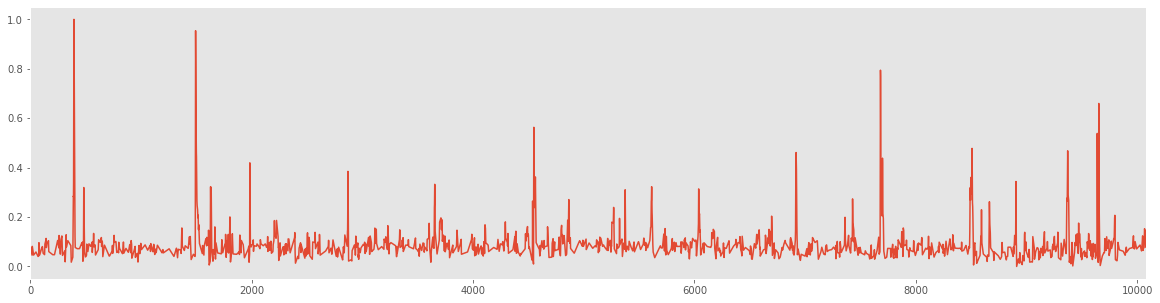

In [126]:
data['y1'].plot(figsize=(20,5))
plt.grid()

In [127]:
h2s = data.copy()

In [128]:
h2s.drop(['y1'], axis=1, inplace=True)

In [129]:
h2s.head()

,a1,a2,a3,a4,a5,y2
0,0.663113,0.774276,0.470970,0.096044,0.019865,0.191476
1,0.659960,0.766021,0.473398,0.111023,0.027957,0.174192
2,0.654670,0.767519,0.474198,0.105410,0.028907,0.165544
3,0.653325,0.769922,0.475963,0.066221,0.029411,0.168190
4,0.654726,0.760449,0.478833,0.033746,0.031592,0.170836


In [130]:
h2s.corr().style.background_gradient(cmap='YlGnBu').format("{:.3f}")

,a1,a2,a3,a4,a5,y2
a1,1.000,0.913,-0.030,0.220,0.366,0.072
a2,0.913,1.000,-0.234,0.237,0.330,0.133
a3,-0.030,-0.234,1.000,-0.234,-0.319,-0.117
a4,0.220,0.237,-0.234,1.000,0.876,0.054
a5,0.366,0.330,-0.319,0.876,1.000,0.061
y2,0.072,0.133,-0.117,0.054,0.061,1.000


In [131]:
h2s['a1_sq'] = h2s['a1']**2

In [132]:
h2s['a1_cu'] = h2s['a1']**3
h2s['a1_log'] = np.log(h2s['a1'])


C:\Users\sanjiv\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [133]:
h2s['a1_inv'] = 1/h2s['a1']

In [134]:
h2s['a1_sqrt'] = np.sqrt(h2s['a1'])

In [135]:
h2s.head()

,a1,a2,a3,a4,a5,y2,a1_sq,a1_cu,a1_log,a1_inv,a1_sqrt
0,0.663113,0.774276,0.470970,0.096044,0.019865,0.191476,0.439719,0.291583,-0.410810,1.508039,0.814318
1,0.659960,0.766021,0.473398,0.111023,0.027957,0.174192,0.435547,0.287444,-0.415576,1.515243,0.812379
2,0.654670,0.767519,0.474198,0.105410,0.028907,0.165544,0.428593,0.280587,-0.423624,1.527487,0.809117
3,0.653325,0.769922,0.475963,0.066221,0.029411,0.168190,0.426834,0.278861,-0.425681,1.530632,0.808285
4,0.654726,0.760449,0.478833,0.033746,0.031592,0.170836,0.428666,0.280659,-0.423538,1.527356,0.809151


In [136]:
h2s_corr = h2s.corr()
mask = np.zeros_like(h2s_corr)
mask[np.triu_indices_from(mask)] = True

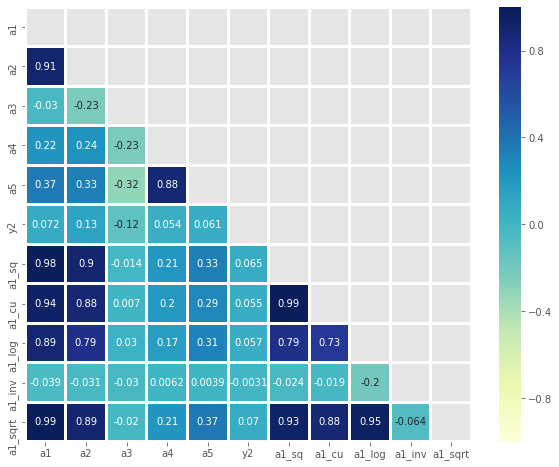

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(h2s_corr, annot=True, cmap='YlGnBu', vmax=1.0, vmin=-1.0, mask=mask, linewidths=2)


To deal with multi collinearity, we need to drop the variables which are highly correlated. High correlation does not add value to the model.
- `a1` and `a2` look highly correlated.
- `a4` and `a5` look highly correlated.

We will drop `a2` and `a5`, both air flows.

There is a very weak correlation, so performing `Linear Regression` gives a very poor fit.

In [65]:
h2s.drop(['a2', 'a5'], axis=1, inplace = True)

In [66]:
h2s.drop_duplicates(keep='first', inplace=True)

In [67]:
h2s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10081 entries, 0 to 10080
Data columns (total 4 columns):
a1    10081 non-null float64
a3    10081 non-null float64
a4    10081 non-null float64
y2    10081 non-null float64
dtypes: float64(4)
memory usage: 393.8 KB


In [69]:
X = h2s.drop(['y2'], axis = 1)
y = h2s['y2']

In [70]:
print(X.shape, y.shape)

(10081, 3) (10081,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

## Model

In [72]:
model_lr = LinearRegression()

In [73]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
model_lr.intercept_

0.17520787300686863

In [75]:
model_lr.coef_

array([ 0.01717334, -0.03802383,  0.00400851])

In [76]:
model_lr_pred = model_lr.predict(X_test)

In [77]:
model_lr_pred

array([0.16270641, 0.17405914, 0.16650138, ..., 0.16276941, 0.17813586,
       0.16140528])

In [78]:
master = y_test.to_frame('y_actual')

In [79]:
master['y_pred'] = model_lr_pred

In [80]:
master.head()

,y_actual,y_pred
8278,0.176671,0.162706
7596,0.160272,0.174059
9255,0.116903,0.166501
6743,0.181636,0.171236
7423,0.112503,0.171682


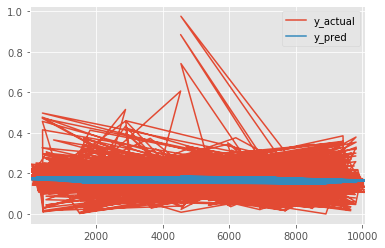

In [81]:
master.plot()

In [82]:
model_lr.score(X_test, y_test)

0.02255036728469051

In [83]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [84]:
model_ols = sm.OLS(y_train, X_train)

In [85]:
results = model_ols.fit()


In [96]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                          1.522e+04
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                        0.00
Time:                        23:09:41   Log-Likelihood:                          9209.6
No. Observations:                7056   AIC:                                 -1.841e+04
Df Residuals:                    7053   BIC:                                 -1.839e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_test, model_lr_pred)

0.02255036728469051

In [89]:
model_rf = RandomForestRegressor()

In [90]:
model_rf.fit(X_train, y_train)

C:\Users\sanjiv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [91]:
model_rf_pred = model_rf.predict(X_test)

In [92]:
model_rf_pred

array([0.1677727 , 0.17952695, 0.16713093, ..., 0.1441725 , 0.1608756 ,
       0.14605598])

In [93]:
model_rf.score(X_train, y_train)

0.8550734921706538

In [94]:
r2_score(y_test, model_rf_pred)

0.3698942450927355